# Part 2: Feature Engineering

This workbook is 2 out of 3 parts of a prediction model to determine the occurrence of West Nile Virus (WNV). The focus of this part is to perform feature engineering on the combined dataset for train and weather that will be fed to the model.

It was noted that higher temperature and lower precipitation has a general trend with prescence of WNV. Outside of these indicators, other features is not that conclusive.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
pd.set_option('display.max_columns', None)

In [3]:
train_weather_df = pd.read_csv('../datasets/train_weather.csv')

In [11]:
train_weather_df.head()

,Unnamed: 0,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,...,gr,hz,mifg,ra,sn,sq,ts,tsra,vcfg,vcts
0,0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
train_weather_df.drop(['Unnamed: 0'],axis=1, inplace=True)

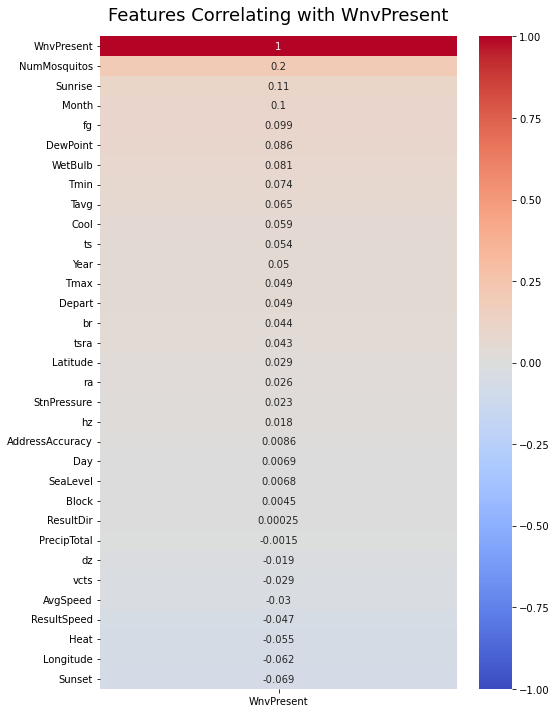

In [19]:
# Plot heatmap correlating to WnvPresent
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train_weather_df.corr()[['WnvPresent']].sort_values(by='WnvPresent', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with WnvPresent', fontdict={'fontsize':18}, pad=16);

In [15]:
train_weather_df.drop(['Station', 
                       'bcfg',
                       'fu',
                       'gr',
                       'mifg',
                       'sn',
                       'sq',
                       'vcfg'
                      ],axis=1, inplace=True)

In [18]:
train_weather_df.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Day,Month,Year,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,br,dz,fg,hz,ra,ts,tsra,vcts
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0,29,5,2007,88.0,62.5,75.5,10.0,58.5,65.5,0.0,10.5,421.0,1917.0,0.0,29.415,30.1,5.8,17.0,6.95,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
